In [2]:
import os
os.chdir('..')
os.getcwd()

import pandas as pd
pd.set_option('display.max_columns', 200)

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

from src.preprocessing import preprocess_data
from src import config

In [3]:
data = pd.read_csv("data/data_literacy_students.csv")

E:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: DtypeWarning: Columns (54) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# data preprocessing step
preprocessed_data = preprocess_data(data)

In [5]:
# selecting students who are not currently studying
preprocessed_data = preprocessed_data[(preprocessed_data["DROPPED_TARGET"].notna())]
dropped = preprocessed_data["DROPPED_TARGET"].values

# drop columns irrelevant for this analysis 
truncated_data = preprocessed_data.drop(columns=config.MODEL_DROP_COLUMNS)

In [6]:
# applying PCA to data
pca = PCA(n_components=2)
pca.fit(truncated_data)

points_2d_pca = pca.transform(truncated_data)
df_2d_pca = pd.DataFrame(points_2d_pca, columns=["x", "y"])
df_2d_pca["dropped"] = dropped

In [7]:
# applying t-SNE to data
tsne = TSNE(n_components=2, perplexity=35)
points_2d_tsne = tsne.fit_transform(truncated_data) 

df_2d_tsne = pd.DataFrame(points_2d_tsne, columns=["x", "y"])
df_2d_tsne["dropped"] = dropped

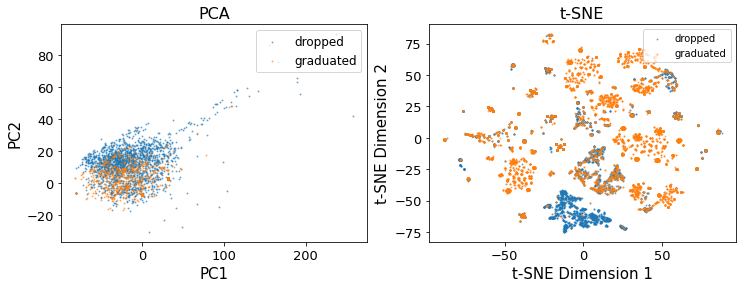

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(5, 4))
plt.subplots_adjust(right=2)
axs[0].scatter(df_2d_pca[df_2d_pca["dropped"] == 0].x, df_2d_pca[df_2d_pca["dropped"] == 0].y, 
               s=1, alpha=0.5, label="dropped")
axs[0].scatter(df_2d_pca[df_2d_pca["dropped"] == 1].x, df_2d_pca[df_2d_pca["dropped"] == 1].y, 
               s=1, alpha=0.5, label="graduated")

axs[0].set_title("PCA", fontsize=16)
axs[0].set_xlabel("PC1", fontsize=15)
axs[0].set_ylabel("PC2", fontsize=15)
axs[0].legend(loc=1, fontsize=12)


axs[1].scatter(df_2d_tsne[df_2d_tsne["dropped"] == 0].x, df_2d_tsne[df_2d_tsne["dropped"] == 0].y, 
               s=1, alpha=0.5, label="dropped")
axs[1].scatter(df_2d_tsne[df_2d_tsne["dropped"] == 1].x, df_2d_tsne[df_2d_tsne["dropped"] == 1].y, 
               s=1, alpha=0.5, label="graduated")

axs[1].set_title("t-SNE", fontsize=16)
axs[1].set_xlabel("t-SNE Dimension 1", fontsize=15)
axs[1].set_ylabel("t-SNE Dimension 2", fontsize=15)
axs[1].legend(loc=1)
axs[0].tick_params(axis='both', which='major', labelsize=13)
axs[1].tick_params(axis='both', which='major', labelsize=13)
fig.savefig("gfx/pca_tsne.pdf")
plt.show()